In [1]:
import pandas as pd
df = pd.read_csv("mumbai_flats.csv")
df.head(3)

,flat_type,price,address,buildup_area,avg_price_sqft,age_of_property,possesion_status,which_floor,facing,furnicing,project_name,brokrage,carpet_area,bedrooms,bathrooms,balcony,parking,about_property
0,3 BHK Flat,3.95 Cr,"Runwal Forest Tower 5 To 8, Kanjurmarg West, M...",1550 sq.ft,₹25.48 K/sq.ft,3 Year Old,Ready to move,Higherof 50 floors,Fully Furnished,NaN,Runwal Forest Tower 5 To 8,4.0 LacsAccess Zero Brokerage Properties,1130 sq.ft,3,2,1,2 Covered Parking,Exclusive 3 bhk with 3 bathroom apartment ava...
1,1 BHK Flat,19.0 L,"Ananta Vardhman Nagar, Tembhode, Palghar, Mumbai",630 sq.ft,₹3.02 K/sq.ft,3 Year Old,Ready to move,Middleof 4 floors,Unfurnished,NaN,Ananta Vardhman Nagar,No ChargeAccess Zero Brokerage Properties,390 sq.ft,1,1,2,1 Open Parking,"1 BHK Flat for sale in Palghar, Mumbai - conta..."
2,1 BHK Flat,73.0 L,"JP North Barcelona, Kashimira, Mira Road East,...",580 sq.ft,₹12.59 K/sq.ft,1 Years Old,Ready to move,Lowerof 25 floors,Semi Furnished,NaN,JP North Barcelona,1.5 LacsAccess Zero Brokerage Properties,475 sq.ft,1,2,2,No Parking,1 BHK Flat for sale in Mumbai. This property i...


In [2]:
df.isnull().sum()

flat_type              0
price                  1
address                0
buildup_area           0
avg_price_sqft         0
age_of_property        0
possesion_status       1
which_floor           48
facing              1983
furnicing           9954
project_name           1
brokrage               1
carpet_area            1
bedrooms               1
bathrooms            136
balcony              215
parking                1
about_property         1
dtype: int64

In [29]:
import numpy as np
import re
from sklearn.preprocessing import MinMaxScaler
import seaborn as sns
import matplotlib.pyplot as plt

# Handeling missing values

In [6]:
def convert_price(value):
    value = str(value).strip()
    if 'Cr' in value:
        return float(value.replace(' Cr', '')) * 10000000  # Convert Crore to numeric
    elif 'L' in value:
        return float(value.replace(' L', '')) * 100000    # Convert Lakh to numeric
    else:
        return np.nan  

# Appling price conversion
df['price'] = df['price'].apply(convert_price)

In [7]:
df.isnull().sum()

flat_type              0
price                  1
address                0
buildup_area           0
avg_price_sqft         0
age_of_property        0
possesion_status       1
which_floor           48
facing              1983
furnicing           9954
project_name           1
brokrage               1
carpet_area            1
bedrooms               1
bathrooms            136
balcony              215
parking                1
about_property         1
dtype: int64

In [11]:
def extract_floor(value):
    match = re.search(r'\d+', str(value))  
    return int(match.group()) if match else np.nan

df['which_floor'] = df['which_floor'].apply(extract_floor)

# Function to clean facing column
def clean_facing(value):
    return str(value).replace(' facingFacing', '').strip()

df['facing'] = df['facing'].apply(clean_facing)

# Function to clean furnicing column
def clean_furnicing(value):
    return str(value).replace('Furnishing', '').strip()

df['furnicing'] = df['furnicing'].apply(clean_furnicing)

In [19]:
def clean_carpet_area(value):
    match = re.search(r'\d+', str(value))  
    return float(match.group()) if match else np.nan

df['carpet_area'] = df['carpet_area'].apply(clean_carpet_area)

In [15]:
# Convert numeric columns stored as strings to proper numeric types
numeric_cols = ['price', 'which_floor', 'carpet_area', 'bedrooms', 'bathrooms', 'balcony', 'parking']
df[numeric_cols] = df[numeric_cols].apply(pd.to_numeric, errors='coerce')

In [17]:
df[numeric_cols] = df[numeric_cols].apply(lambda x: x.fillna(x.median()))
categorical_cols = ['facing', 'furnicing', 'project_name', 'about_property']
df[categorical_cols] = df[categorical_cols].apply(lambda x: x.fillna(x.mode()[0]))

In [18]:
df.isnull().sum()

flat_type              0
price                  0
address                0
buildup_area           0
avg_price_sqft         0
age_of_property        0
possesion_status       1
which_floor            0
facing                 0
furnicing              0
project_name           0
brokrage               1
carpet_area            0
bedrooms               0
bathrooms              0
balcony                0
parking             9955
about_property         0
dtype: int64

In [20]:
df.head(3)

,flat_type,price,address,buildup_area,avg_price_sqft,age_of_property,possesion_status,which_floor,facing,furnicing,project_name,brokrage,carpet_area,bedrooms,bathrooms,balcony,parking,about_property
0,3 BHK Flat,39500000.0,"Runwal Forest Tower 5 To 8, Kanjurmarg West, M...",1550 sq.ft,₹25.48 K/sq.ft,3 Year Old,Ready to move,50.0,Fully Furnished,nan,Runwal Forest Tower 5 To 8,4.0 LacsAccess Zero Brokerage Properties,1130.0,3.0,2.0,1.0,NaN,Exclusive 3 bhk with 3 bathroom apartment ava...
1,1 BHK Flat,1900000.0,"Ananta Vardhman Nagar, Tembhode, Palghar, Mumbai",630 sq.ft,₹3.02 K/sq.ft,3 Year Old,Ready to move,4.0,Unfurnished,nan,Ananta Vardhman Nagar,No ChargeAccess Zero Brokerage Properties,390.0,1.0,1.0,2.0,NaN,"1 BHK Flat for sale in Palghar, Mumbai - conta..."
2,1 BHK Flat,7300000.0,"JP North Barcelona, Kashimira, Mira Road East,...",580 sq.ft,₹12.59 K/sq.ft,1 Years Old,Ready to move,25.0,Semi Furnished,nan,JP North Barcelona,1.5 LacsAccess Zero Brokerage Properties,475.0,1.0,2.0,2.0,NaN,1 BHK Flat for sale in Mumbai. This property i...


## Detecting and removing outliers using IQR method

In [21]:
outlier_cols = ['price', 'carpet_area']  
for col in outlier_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]

### Normalizing numerical features

In [24]:
scaler = MinMaxScaler()
df[outlier_cols] = scaler.fit_transform(df[outlier_cols])

In [25]:
# Displaying cleaned data
df.describe()

,price,which_floor,carpet_area,bedrooms,bathrooms,balcony,parking
count,9095.000000,9095.000000,9095.000000,9095.000000,9095.000000,9095.000000,0.0
mean,0.289428,18.409676,0.257350,2.036064,2.068609,1.983178,NaN
std,0.225011,11.842265,0.231534,0.842578,0.642768,0.542501,NaN
min,0.000000,1.000000,0.000000,1.000000,1.000000,1.000000,NaN
25%,0.121584,10.000000,0.001082,1.000000,2.000000,2.000000,NaN
50%,0.228946,16.000000,0.242834,2.000000,2.000000,2.000000,NaN
75%,0.396960,22.000000,0.405084,3.000000,2.000000,2.000000,NaN
max,1.000000,79.000000,1.000000,7.000000,6.000000,7.000000,NaN


In [27]:
# saving the cleaned data into csv
df.to_csv('cleaned_mumbai_flats.csv', index=False)
print("\nCleaned data saved as 'cleaned_mumbai_flats.csv'")


Cleaned data saved as 'cleaned_mumbai_flats.csv'


# Visualization

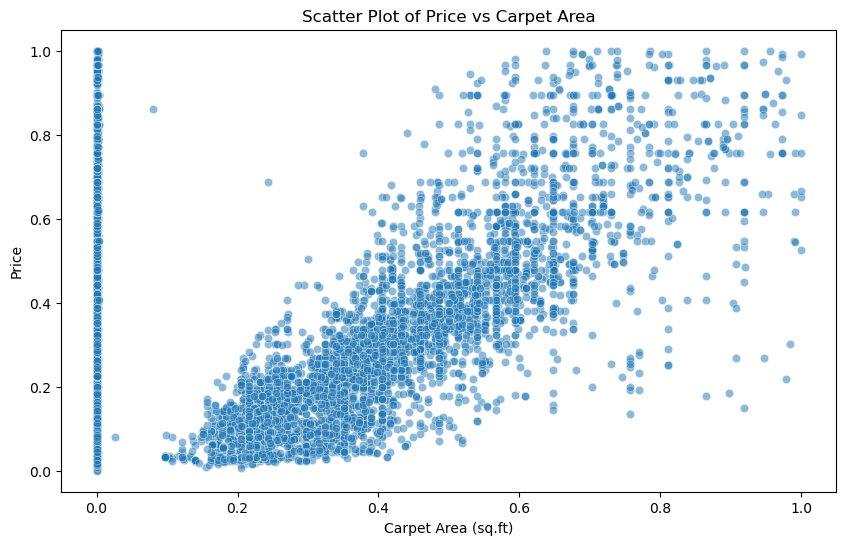

In [30]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x=df['carpet_area'], y=df['price'], alpha=0.5)
plt.xlabel('Carpet Area (sq.ft)')
plt.ylabel('Price')
plt.title('Scatter Plot of Price vs Carpet Area')
plt.show()

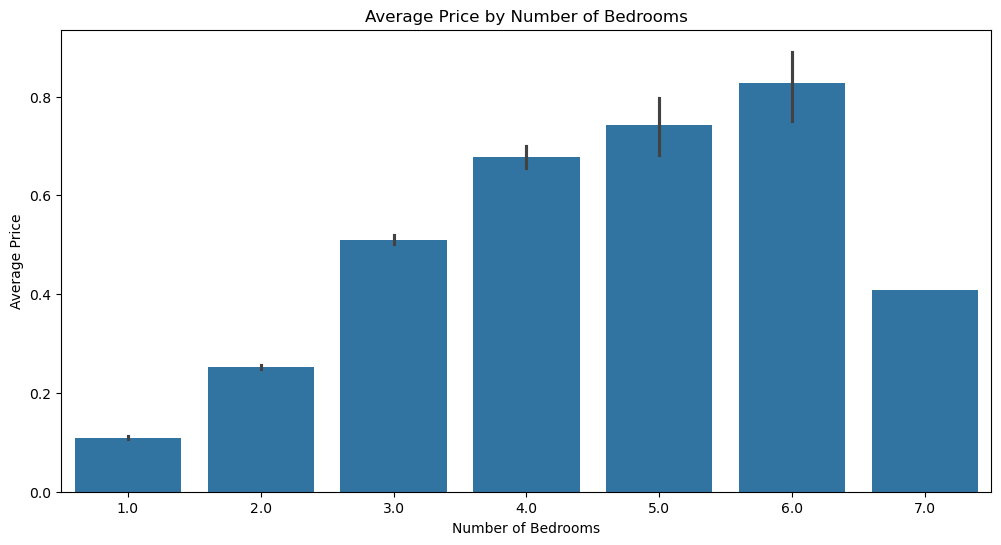

In [31]:
plt.figure(figsize=(12, 6))
sns.barplot(x=df['bedrooms'], y=df['price'], estimator=np.mean)
plt.xlabel('Number of Bedrooms')
plt.ylabel('Average Price')
plt.title('Average Price by Number of Bedrooms')
plt.show()

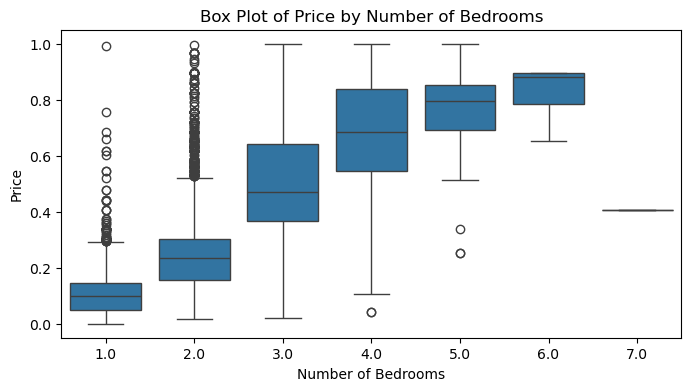

In [32]:
plt.figure(figsize=(8, 4))
sns.boxplot(x=df['bedrooms'], y=df['price'])
plt.xlabel('Number of Bedrooms')
plt.ylabel('Price')
plt.title('Box Plot of Price by Number of Bedrooms')
plt.show()

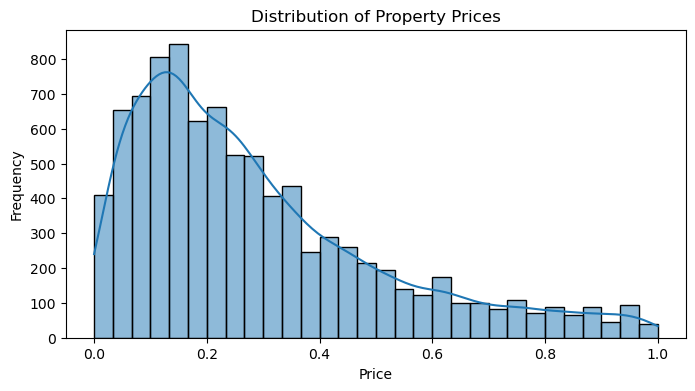

In [33]:
plt.figure(figsize=(8, 4))
sns.histplot(df['price'], bins=30, kde=True)
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.title('Distribution of Property Prices')
plt.show()